In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
import modules.simulation as simulation
import pyccl as ccl

In [2]:
simulator = simulation.UniverseSimulator( default_config_path = '../../config/capish.ini', 
                                         variable_params_names = ['Omega_m', 'sigma_8'])

In [3]:
new_config = simulator.new_config_files([0.25, 0.8])

In [4]:
log10m_true, z_true = simulator.halo_catalogue_class.get_halo_catalogue(new_config)
richness, log10mWL, z_obs = simulator.cluster_catalogue_class.get_cluster_catalogue(log10m_true, z_true, new_config)

In [5]:
count, mean_mass = simulator.summary_statistics_class.get_summary_statistics(richness, log10mWL, z_obs, new_config)

In [6]:
new_config['summary_statistics']['which'] = '3d_count'

In [7]:
new_config['summary_statistics']['which']

'3d_count'

In [8]:
threed_count = simulator.summary_statistics_class.get_summary_statistics(richness, log10mWL, z_obs, new_config)

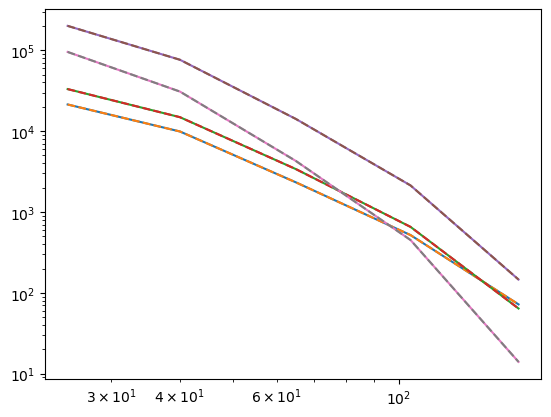

In [9]:
for i in range(len(simulator.summary_statistics_class.redshift_edges) - 1):
    plt.plot(simulator.summary_statistics_class.richness_centers, count[:,i])
    plt.plot(simulator.summary_statistics_class.richness_centers, np.sum(threed_count, axis=2)[:,i], '--')
plt.xscale('log')
plt.yscale('log')